# Задача

Вам дан файл `beauty.csv`, в котором собраны несколько факторов про различных людей (мужчин и женщин): зарплата, опыт, цвет кожи, здоровье и т.д.

В последней колонке - целевое значение, которое требуется предсказать. Это то, как выглядит человек (красота) по шкале от 1 до 5. Принимаем, что это задача регрессии, т.е. на выходе могут получаться предикты вроде 3.6

Сначала нужно считать файл и убедиться, что все корректно сохранилось в таблицу.

In [1]:
import pandas as pd

In [2]:
with open('beauty.csv') as f:
    df = pd.read_csv(f, sep=';')

In [50]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [70]:
df.dtypes

wage        float64
exper         int64
union         int64
goodhlth      int64
black         int64
female        int64
married       int64
service       int64
educ          int64
looks         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


#### Вывести распределение таргета

Визуально определить, к какому распределению принадлежит эта величина

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

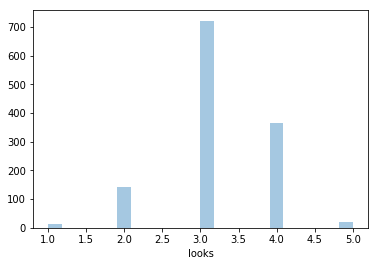

In [7]:
sns.distplot(df['looks'], kde=False)
plt.show()

#### Разделить выборку на train и test с помощью sklearn

А потом убедиться, что распределения таргетов в каждой выборке схожи.

In [10]:
from sklearn import model_selection

In [32]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df[['wage','exper','union','goodhlth','black','female','married','service','educ']].values, 
    df['looks'].values, 
    test_size=0.2, 
    random_state=42,
)

In [33]:
X_train.shape

(1008, 9)

In [34]:
X_test.shape

(252, 9)

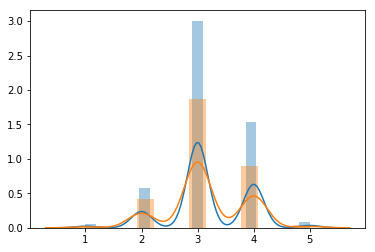

In [35]:
sns.distplot(y_train)
sns.distplot(y_test)
plt.show()

#### Провести регрессионный анализ

In [36]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Посмотрим на коэффициенты и свободный член

In [38]:
lr.coef_

array([ 0.00742907, -0.00762792, -0.01146949,  0.12908124,  0.06010846,
        0.01105544, -0.05654654, -0.043495  ,  0.03274573])

In [39]:
lr.intercept_

2.800446434362164

In [48]:
lr.predict([X_test[0]])[0], y_test[0]

(3.4449907356691267, 5)

In [55]:
lr.score(X_test, y_test)

0.03605508912582145

In [44]:
import numpy as np

In [45]:
coefs_arr = np.array(sorted(
    list(zip(df.columns[:-1], lr.coef_)), 
    key=lambda x: x[1],
    reverse=True,
))
coefs_arr

array([['goodhlth', '0.12908123953946063'],
       ['black', '0.06010845963287391'],
       ['educ', '0.03274572782169686'],
       ['female', '0.011055440095125098'],
       ['wage', '0.007429073949006974'],
       ['exper', '-0.007627918362989926'],
       ['union', '-0.011469492740324792'],
       ['service', '-0.04349499845165639'],
       ['married', '-0.056546541795681915']], dtype='<U21')

#### Вывести с помощью barh значимость факторов

Что влияет сильнее всего? Слабее всего?

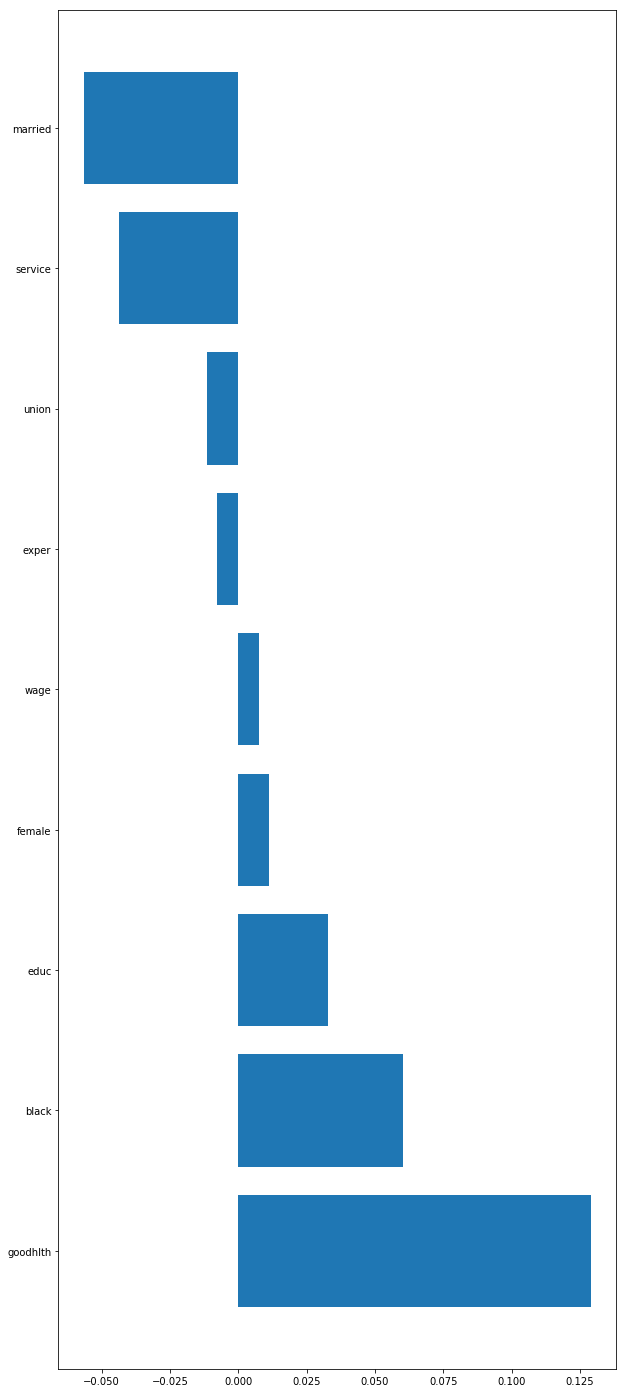

In [46]:
fig = plt.figure(figsize=[10, 25])
plt.barh(coefs_arr[:, 0], coefs_arr[:, 1].astype(float))
plt.show()

#### Посчитать ошибку (какую сочтете нужным)

In [47]:
from sklearn import metrics

In [51]:
predicts_test = lr.predict(X_test)
predicts_train = lr.predict(X_train)

In [53]:
metrics.mean_absolute_error(y_train, predicts_train)

0.5135394301443589

In [52]:
metrics.mean_absolute_error(y_test, predicts_test)

0.5174885303952732

In [54]:
metrics.mean_squared_error(y_test, predicts_test), metrics.mean_squared_error(y_train, predicts_train)

(0.44238489673905684, 0.44755006448543827)

## Задание 2

Провести аналогичный регрессионный анализ, но реализовать Метод наименьших квадратов (МНК) самостоятельно, не используя функции библиотеки sklearn.

## Задание 3

Добавить фактор looks_good(если looks больше 3, то 1, меньше 0)

Не использую looks предсказать использия логистическую регрессию looks_good

In [ ]:
# your code here